(sec:matplotlib)=

# Matplotlib の基本


## Matplotlib とは？


Matplotlib はデータ可視化のための Python のライブラリで、様々なグラフを細かく調整を入れて作成することができる。

また、今日は類似するライブラリとして[Seaborn](https://seaborn.pydata.org/)や[Plotly](https://plotly.com/python/), [Bokeh](https://bokeh.org/)などがあり、この中で Matplotlib は比較的単純 (がゆえに綺麗な可視化をしようとすると手間がかかる...)で、それ故、現在でも広く用いられているライブラリである。特に、Matplotlib は文法が MATLAB と類似しているため、MATLAB を使い慣れている読者には親しみやすいかもしれない。

本講義では、その単純さから Matplotlib を用いるが、必要に応じて、Seaborn, Plotly, Bokeh のギャラリーなどを見て、自分の好みのライブラリを使うのが良いだろう。


In [1]:
"""
下準備のコード
"""

import warnings

import matplotlib
import seaborn as sns

# 一部の警告を無視
warnings.simplefilter("ignore", category=FutureWarning)

# グラフの設定
rc = {"figure.dpi": 150}
sns.set_theme(style="white", palette="colorblind", rc=rc)
color_palette = sns.color_palette("colorblind")

## 基本的なグラフの作成


### 空の画面を表示する


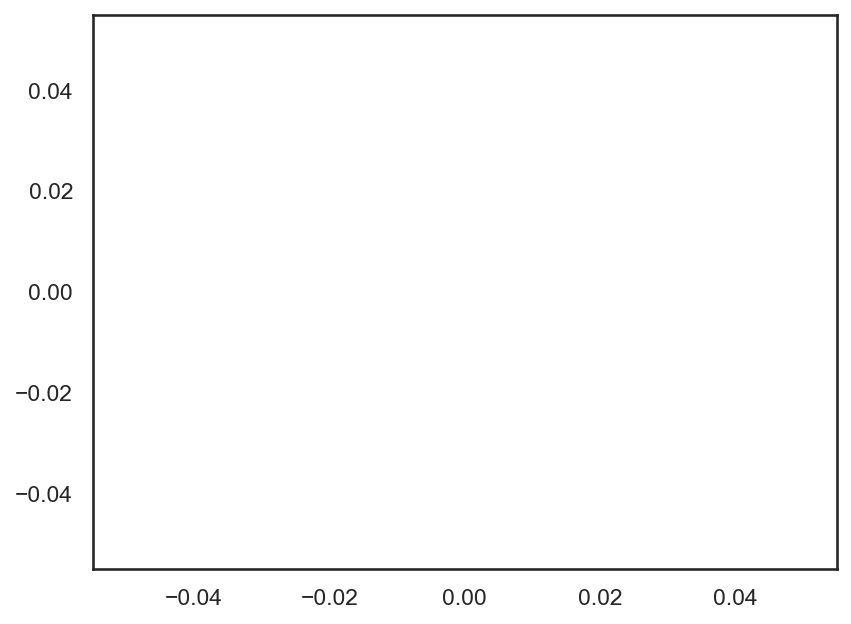

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot()
plt.show()

### 折れ線グラフ


折れ線グラフは `plt.plot` を用いて作成できる。これを用いて、sin 関数を $[-\pi, \pi]$ の範囲で書いてみよう。データの準備には NumPy の `numpy.linspace` 関数を使うと良い。


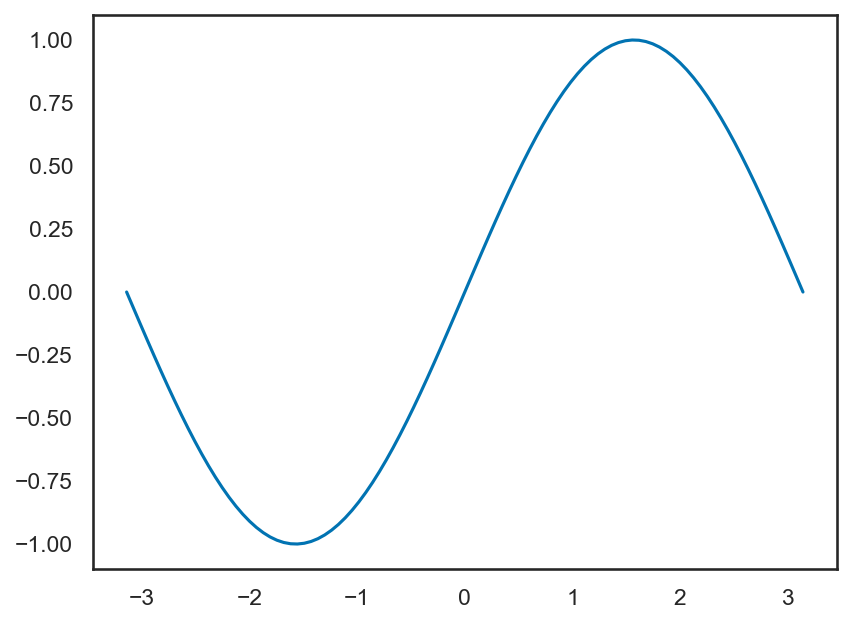

In [3]:
# データの用意
xs = np.linspace(-np.pi, np.pi, 100)  # [-pi, pi]を100分割
ys = np.sin(xs)
# 折れ線グラフの描画
plt.plot(xs, ys)
plt.show()

### 散布図


散布図は `plt.scatter` を用いて作成できる。これを用いて、二次元正規分布に従うデータの散布図を作ってみよう。この際、`plt.xlim`, `plt.ylim` を使った範囲指定と、`plt.gca().set_aspect`を用いたグラフの縦横比の指定をしておこう。


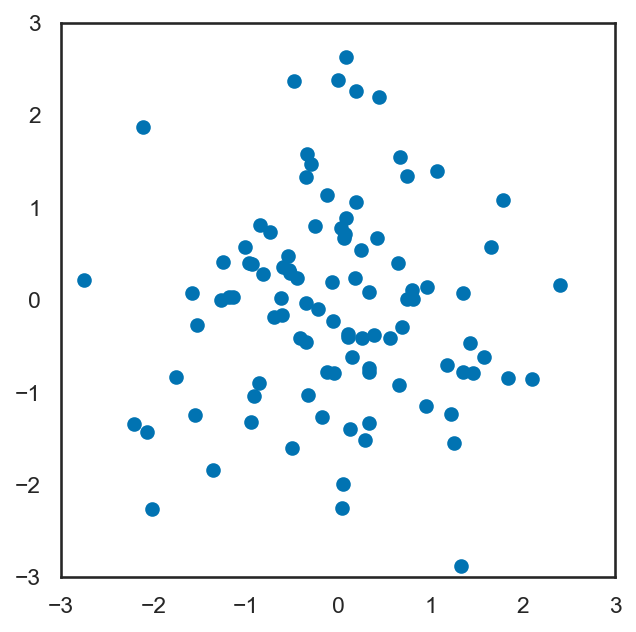

In [4]:
xs, ys = np.random.normal(size=(2, 100))
plt.scatter(xs, ys)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.gca().set_aspect("equal")
plt.show()

### 棒グラフ


棒グラフはラベルと、各ラベルに対する値の組み合わせによって作成する。


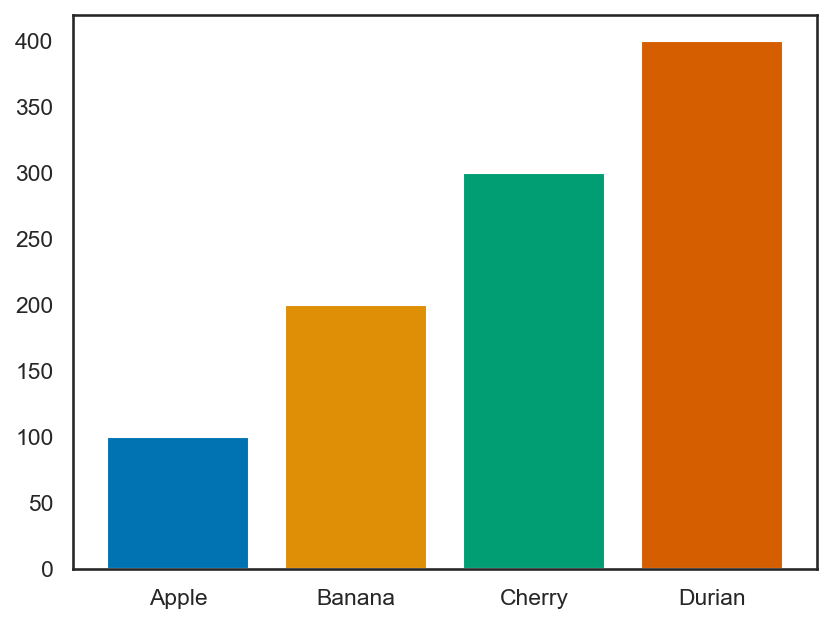

In [5]:
labels = ["Apple", "Banana", "Cherry", "Durian"]
prices = [100, 200, 300, 400]
plt.bar(labels, prices, color=color_palette)
plt.show()

### 円グラフ


円グラフを描く関数 `plt.pie` の使い方は棒グラフのものとほとんど同じだが、引数の指定の仕方が微妙に異なるので注意 (特に色を指定するための引数が棒グラフは`color=...`にも関わらず、円グラフは`colors=...`)。


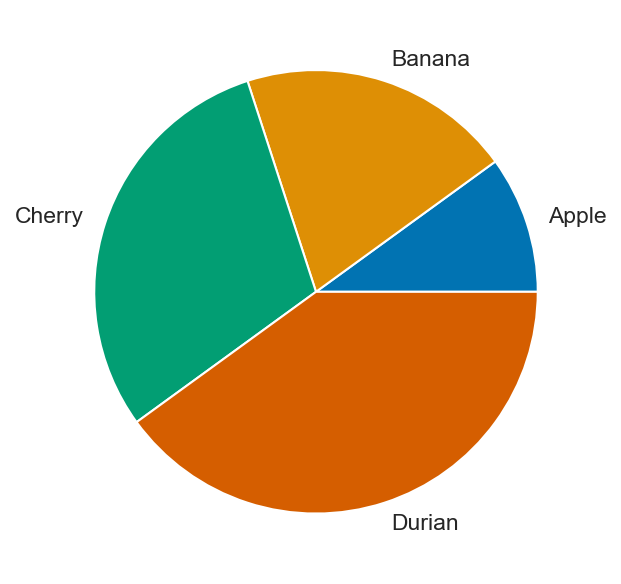

In [6]:
labels = ["Apple", "Banana", "Cherry", "Durian"]
prices = [100, 200, 300, 400]
plt.pie(prices, labels=labels)
plt.show()

### ヒストグラム


ヒストグラムは `plt.hist` 関数を用いれば、グラフの作成とヒストグラム自体の計算を両方行うことができる。以下では、正規分布に従う乱数を 1000 個作成して、その分布がどうなっているかをヒストグラムで表示している。また、以下のコードで使用してはいないものの `freq` と `ranges` はそれぞれヒストグラムの頻度と、その頻度の範囲を示す値の配列 (ビン数+1 の長さ)となっている。


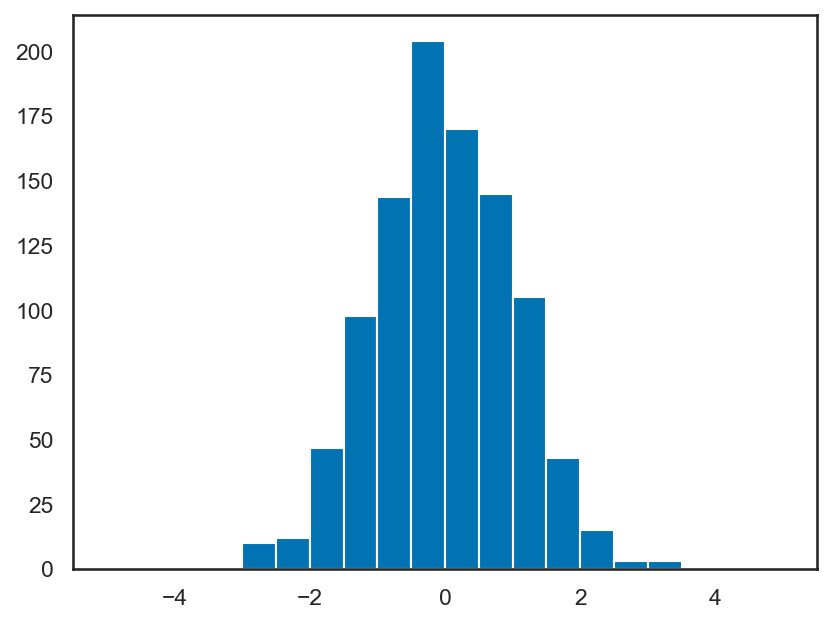

In [7]:
x = np.random.normal(size=(1000))
freq, ranges, _ = plt.hist(x, bins=20, range=[-5, 5])
plt.show()

また、 ヒストグラムを描画する際には、その合計が 1 になるように正規化することも多い。そのようにしたい場合には `plt.hist` の引数に `density=True` を指定する

また、これに加えて、先ほどの `plt.plot` を用いて正規分布 (平均が 0 で分散が 1 のもの)を折れ線グラフでプロットすると、より分かりやすい。


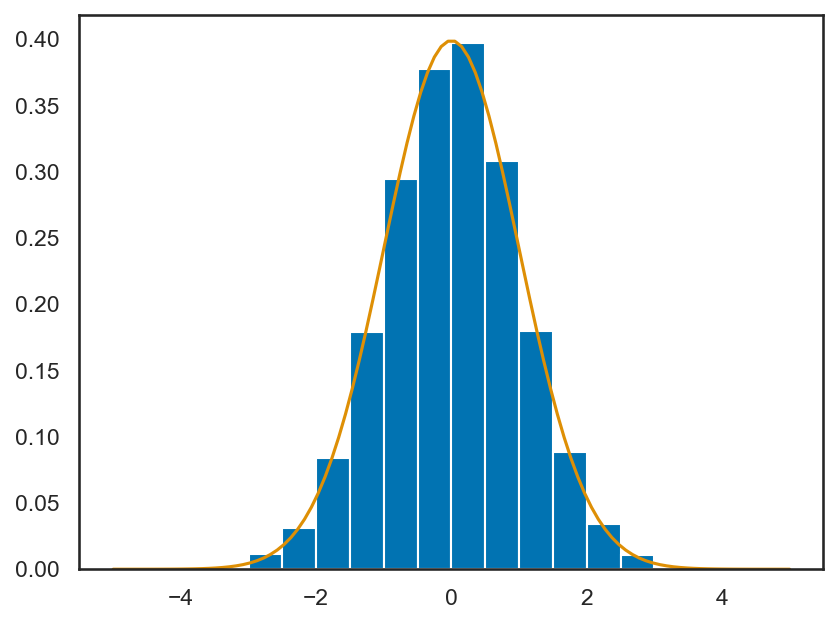

In [8]:
# ヒストグラムの表示
x = np.random.normal(size=(10000))
w = np.ones(len(x)) / len(x)
plt.hist(x, bins=20, range=[-5, 5], density=True)
# 正規分布関数をプロット
xs = np.linspace(-5, 5, 100)
ys = np.exp(-0.5 * xs * xs) / (np.sqrt(2.0 * np.pi))
plt.plot(xs, ys)
plt.show()

### グラフを保存する


グラフを保存するには `plt.savefig` を用いる。この際、JPEG や PNG といったラスタ形式のフォーマットの他、EPS や PDF といったベクタ形式の画像も出力できる。


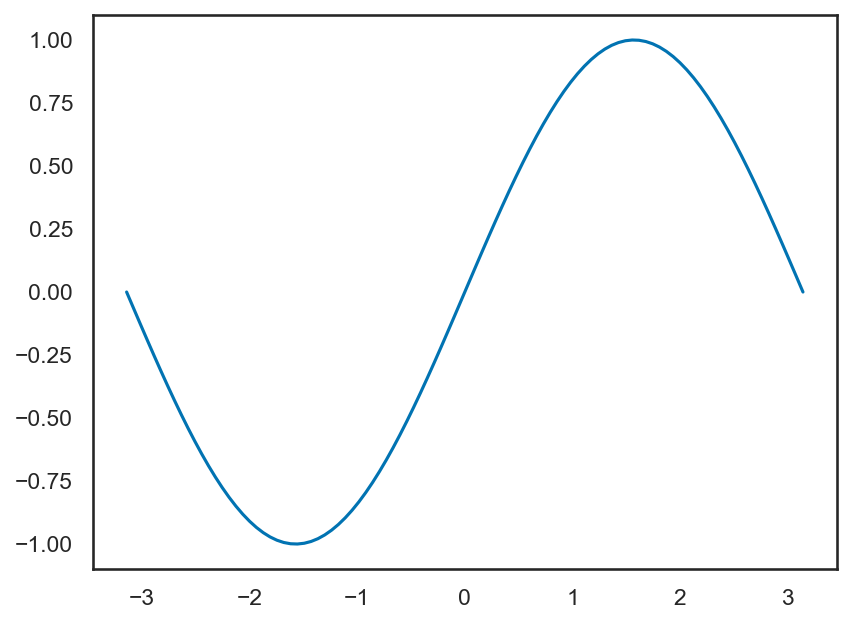

In [9]:
# グラフを描画
xs = np.linspace(-np.pi, np.pi, 100)
ys = np.sin(xs)
plt.plot(xs, ys)
# plt.showが先でも構わないが、後にしておけばグラフ表示時にファイルが保存される
plt.savefig("image.jpg")
plt.show()

画像の計算機上での表現方法には大きく分けてラスタ画像(ピクセル形式とも呼ぶ)とベクタ画像(ドロー形式とも呼ぶ)があり、JPEG 形式等、一般的なカメラで撮影される画像は通常、ラスタ形式で表わされている。詳細については、以下の Tips を見てほしい。


#### 画像の種類について


**ラスタ形式**

ラスタ形式とは、画像が画素の集合で表わされており、例えば 4K 画像、といったときには、3840×2160 ピクセルのように一辺に並ぶ画素数がおよそ 4K(=4000)画素である物を指す。この各画素には、赤、緑、青の各成分の色の強さがどのくらいかを記録する情報が保存されている。このような色の表し方を RGB 表色と呼び、R, G, B の各要素は JPEG や PNG などの「普通の」画像においては 0-255 の値(=8 ビット符号なし整数)で表現されている。このような各色要素を表わすビットの数を「ビット深度」と呼び、JPEG 等の画像は 8 ビットが R, G, B の各要素に使われているので、24bit 深度の画像、ということになる。

その一方で、近年では、スマートフォンのカメラにも HDR 撮影モードが搭載されていることが多い。この HDR というのは High Dynamic Range の略で、各画素の表せる明るさの範囲が上記の 8 ビット深度よりも大きな物を指す。反対に 8 ビット深度の画像のことを LDR (= Low Dynamic Range)画像と呼ぶ。HDR 画像を表わすフォーマットはキヤノンやニコンといったカメラメーカーの独自フォーマットの他に、`*.hdr`形式や`*.exr`形式などのデータ形式がある。多くの場合、R, G, B の各色要素が 16 ビット浮動小数(half float)などの小数によって記録されている。

なお余談にはなるがラスタ画像のラスタ (raster)とは元はラテン語の"rastrum" (英語では rake, 日本語では熊手のこと)から来ており、画素が「くまなく」画像平面を埋め尽くしている様子を表わしている。


**ベクタ形式**

一方で、PDF 等のデータ形式ではベクタ形式が標準となっている。あまり意識することはないかもしれないが、PDF の文書は、ある意味で文字が映った「画像」であり、この画像がベクタ形式で表現されている。ベクタ形式の画像では、各色領域が曲線で囲まれており、その曲線で囲まれた領域の組み合わせによって画像が表現されている。この際、境界の曲線の表現方法がいわゆる「ベクタ」に基づいていることから、このような画像表現法を「ベクタ形式」と呼ぶ。

境界の曲線の表し方には複数の方法があるが、最も広く用いられているのは三次多項式によって部分曲線を表す三次 Bezier 曲線であり、そのつなぎ合わせで複雑な曲線を表わす。この他にも、Catmull-Rom スプラインや B-スプラインといった複数の曲線の表現方がある。なお、ここでいうスプラインとは、一定の弾性を持ち、変形させることで自由な曲線を引くことができる定規のことである。


## グラフの調整


以下では、sin 関数と cos 関数を描画したものを例にして、グラフの見た目を調整していく。


### グラフのタイトル、軸ラベル


Matplotlib でグラフにタイトルをつけるには`plt.title`を用いる。また、軸のラベルを設定するには横軸には`plt.xlabel`、縦軸には`plt.ylabel`を用いる。

なお、この際、グラフのタイトル等の文字列中に`$ ... $`のようにドルマークで囲んだ領域を設けると、ここに LaTeX で用いるような数式を入れることができる。


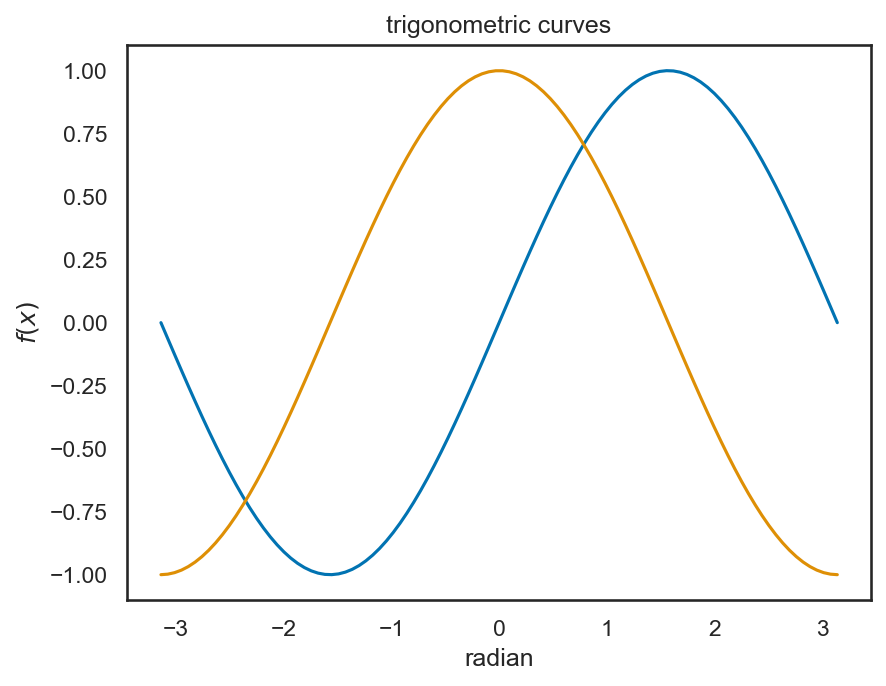

In [10]:
# データの用意
xs = np.linspace(-np.pi, np.pi, 100)
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)
# 折れ線グラフの描画
plt.plot(xs, ys_sin)
plt.plot(xs, ys_cos)
# タイトルの設定
plt.title("trigonometric curves")
plt.xlabel("radian")
plt.ylabel("$f(x)$")  # 数式モード
plt.show()

### グラフの色、スタイルの設定


グラフの色を設定する方法はグラフの種類により微妙に異なるが、`plt.plot`で描く曲線のグラフに関しては、曲線の太さを`linewidth`、曲線の色を`linecolor`、曲線のスタイルを`linestyle`でそれぞれ設定できる。

**曲線の色**
色に関しては`"red"`や`"blue"`のような一般的な色以外にも多数の色が用意されている。詳細は Matplotlib の公式ページを参考にしてほしい。

- List of named colors: <https://matplotlib.org/stable/gallery/color/named_colors.html>

また、色を名前で指定する以外にも、自分で赤、緑、青の色成分の 0.0-1.0 の間の値で与えることでも色をつけられる。

**曲線のスタイル**
曲線のスタイルには破線(`linestyle="--"`)や一点鎖線(`linestyle="-."`)の他にもいくつかのスタイルが用意されている。こちらも、詳細は Matplotlib の公式ページを参考にしてほしい。

- Linestyles: <https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html>


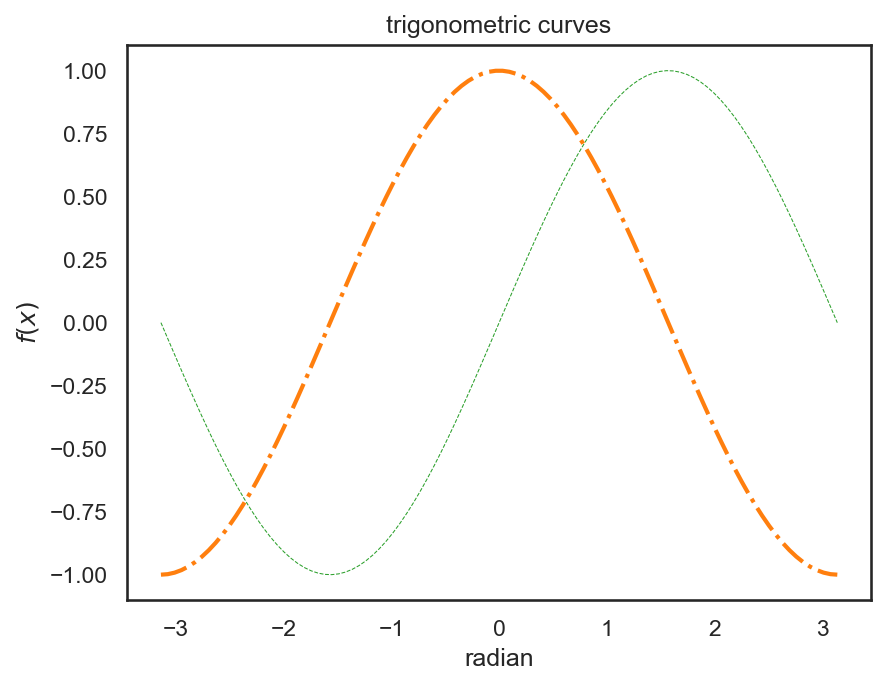

In [11]:
# データの用意
xs = np.linspace(-np.pi, np.pi, 100)
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)

# 折れ線グラフの描画
plt.plot(xs, ys_sin, linestyle="--", color="tab:green", linewidth=0.5)
plt.plot(xs, ys_cos, linestyle="-.", color="tab:orange", linewidth=2)

# タイトルの設定
plt.title("trigonometric curves")
plt.xlabel("radian")
plt.ylabel("$f(x)$")
plt.show()

### 軸の刻み幅、表示形式の調整


軸の刻み幅を変更するには、`plt.xticks`、`plt.yticks`を用いる。


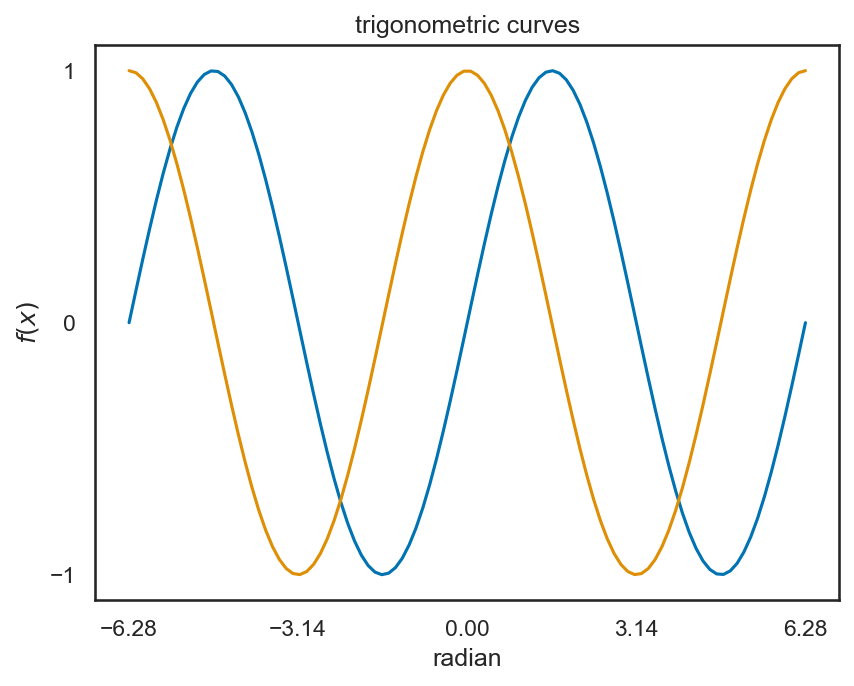

In [12]:
# データの用意
xs = np.linspace(-2.0 * np.pi, 2.0 * np.pi, 100)
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)

# 折れ線グラフの描画
plt.plot(xs, ys_sin)
plt.plot(xs, ys_cos)

# タイトルの設定
plt.title("trigonometric curves")
plt.xlabel("radian")
plt.ylabel("$f(x)$")

# 軸の刻み幅の設定
plt.xticks(np.linspace(-2.0 * np.pi, 2.0 * np.pi, 5))
plt.yticks([-1, 0, 1])
plt.show()

なお、このままでも良いのだが、三角関数を描画するときには、`-3.14`や`3.14`の代わりに$-\pi$や$\pi$と描画したいと考えるだろう。このような場合には、`AxisSubplot`のメソッドである`set_major_formatter`ならびに`set_major_locator`を用いる。

下記のコードでは`unit_of_pi`の中で、横軸の値を$\pi$で除算し、その商に応じて軸の表示方法を変更している。特に、横軸の値が$\pi$の-1 倍、0 倍、1 倍の場合にわざわざ$-1 \pi$と書くのは冗長なので、そのような場合には 1 を削ったり、単に 0 とだけ表示するようにしている。


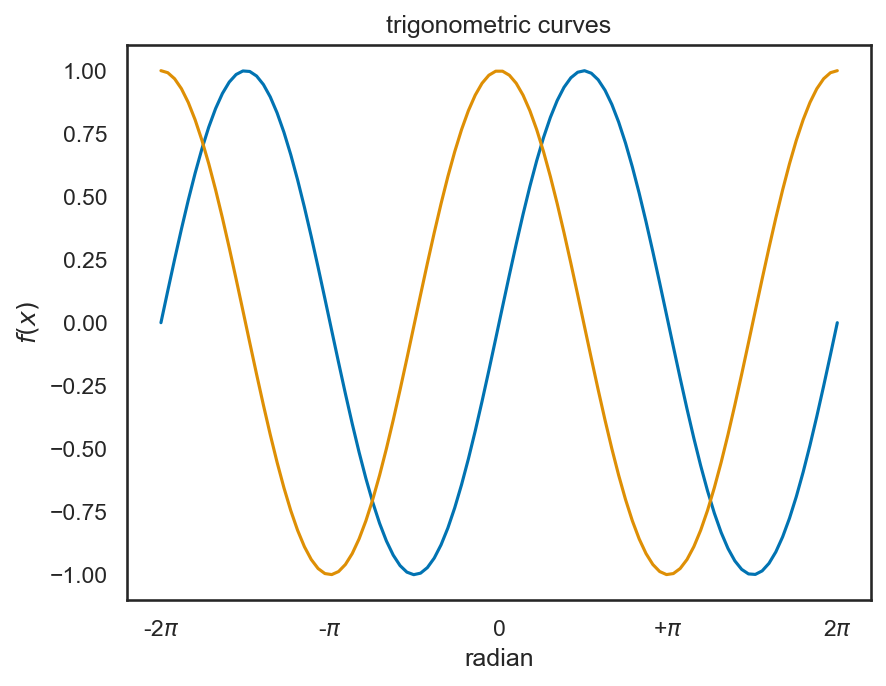

In [13]:
import matplotlib
from matplotlib.ticker import FuncFormatter


def unit_of_pi(value, tick_number):
    """軸の表示をpi単位に変更する関数"""
    N = int(np.round(value / np.pi))
    if N == 0:
        return "0"
    if abs(N) == 1:
        return "{:s}$\pi$".format("+" if N > 0 else "-")
    return "{:d}$\pi$".format(N)


# データの用意
xs = np.linspace(-2.0 * np.pi, 2.0 * np.pi, 100)
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)

# 折れ線グラフの描画
plt.plot(xs, ys_sin)
plt.plot(xs, ys_cos)

# タイトルの設定
plt.title("trigonometric curves")
plt.xlabel("radian")
plt.ylabel("$f(x)$")

# 軸の表示方法の変更
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(unit_of_pi))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=np.pi))
plt.show()

※ 上記コードの`plt.gca()`は、現在描画中のグラフオブジェクト(より厳密には`AxisSubplot`)を返す関数。


### 凡例の表示


凡例を表示するには、各描画要素に`label="xxx"`という引数を与えた上で、描画直前に`plt.legend()`と書けば良い。


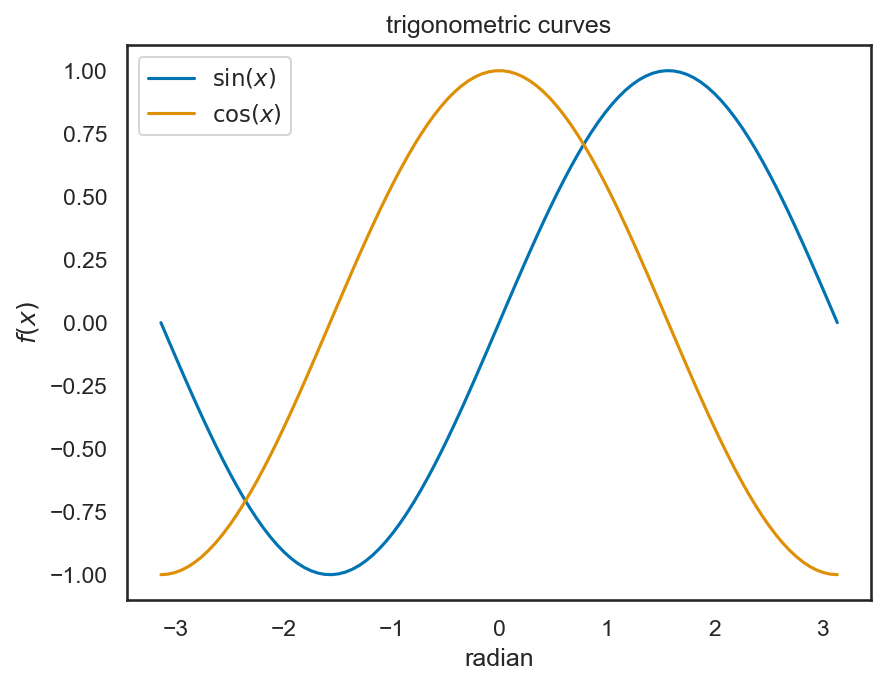

In [14]:
# データの用意
xs = np.linspace(-np.pi, np.pi, 100)
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)

# 折れ線グラフの描画
plt.plot(xs, ys_sin, label="$\sin(x)$")
plt.plot(xs, ys_cos, label="$\cos(x)$")

# タイトルの設定
plt.title("trigonometric curves")
plt.xlabel("radian")
plt.ylabel("$f(x)$")

# 凡例の表示
plt.legend()
plt.show()

なお、凡例の位置は`plt.legend`に対して`loc={位置}`という引数を与えれば良く、位置には

- upper right
- upper left
- lower right
- lower left
- center

などが指定できる。また`bbox_to_anchor`という引数を調整することで枠外に凡例を表示することもできる。この際、単純に`bbox_to_anchor`のみを設定すると、凡例が切れてしまうことがあるため、その場合は`plt.tight_layout`関数にグラフの矩形範囲を表わす`rect=...`という引数を渡してサイズを調整する。

また、凡例の内側マージン (padding)は少々狭めに設定されているので`borderpad`引数を設定するとより見やすくなる。


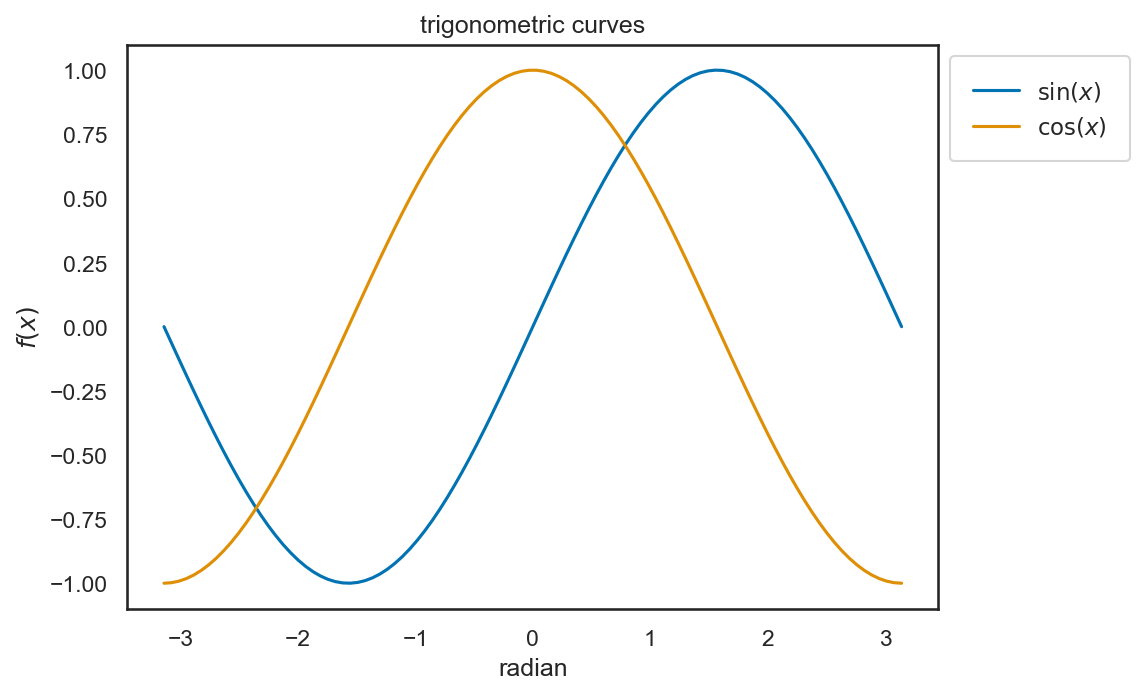

In [15]:
# データの用意
xs = np.linspace(-np.pi, np.pi, 100)
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)

# 折れ線グラフの描画
plt.plot(xs, ys_sin, label="$\sin(x)$")
plt.plot(xs, ys_cos, label="$\cos(x)$")

# タイトルの設定
plt.title("trigonometric curves")
plt.xlabel("radian")
plt.ylabel("$f(x)$")

# 凡例の表示
plt.legend(loc="upper right", borderpad=1, bbox_to_anchor=(1.25, 1.0))
plt.tight_layout(rect=[0.0, 0.0, 1.2, 1.0])
plt.show()

### グリッド線を引く


グリッド線を引くには`plt.grid`を用いる。この関数に軸を表わす`axis`、色を表わす`color`、線のスタイルを表わす`linestyle`等を指定することで、グリッド線の表示をコントロールできる。なおグリッド線は tick の入っている箇所に引かれるので、本数を減らしたい場合は前述の`xticks`、`yticks`で調整をすると良い。


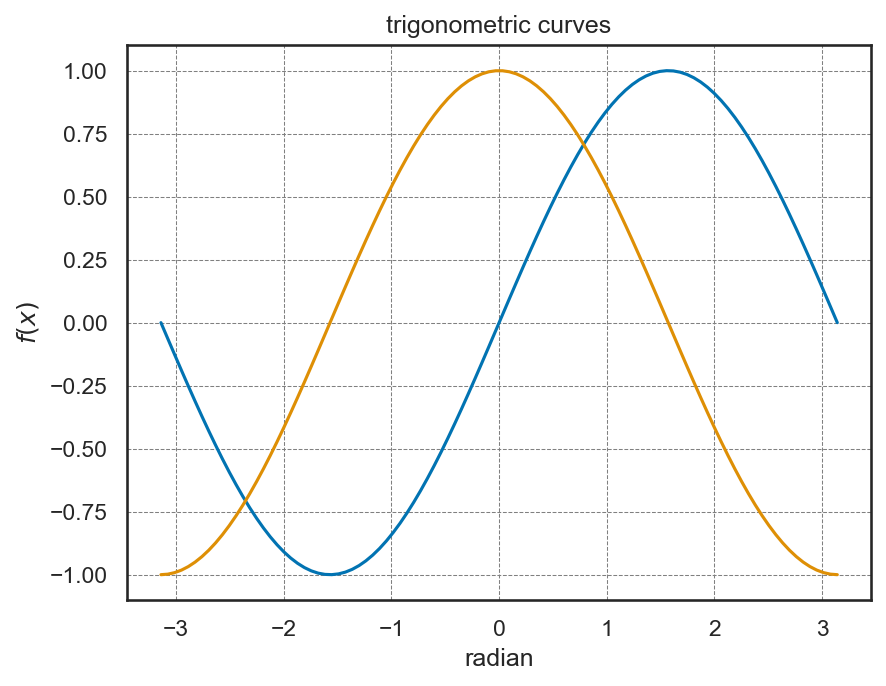

In [16]:
# データの用意
xs = np.linspace(-np.pi, np.pi, 100)
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)

# 折れ線グラフの描画
plt.plot(xs, ys_sin, label="$\sin(x)$")
plt.plot(xs, ys_cos, label="$\cos(x)$")

# タイトルの設定
plt.title("trigonometric curves")
plt.xlabel("radian")
plt.ylabel("$f(x)$")

# グリッド線の表示
plt.grid(axis="x", color="gray", linestyle="--", linewidth=0.5)
plt.grid(axis="y", color="gray", linestyle="--", linewidth=0.5)
plt.show()

### 片対数グラフ、両対数グラフ


x 軸、y 軸のそれぞれを対数目盛に変更することもできる。これには`plt.xscale("log")`、`plt.yscale("log")`を用いる。


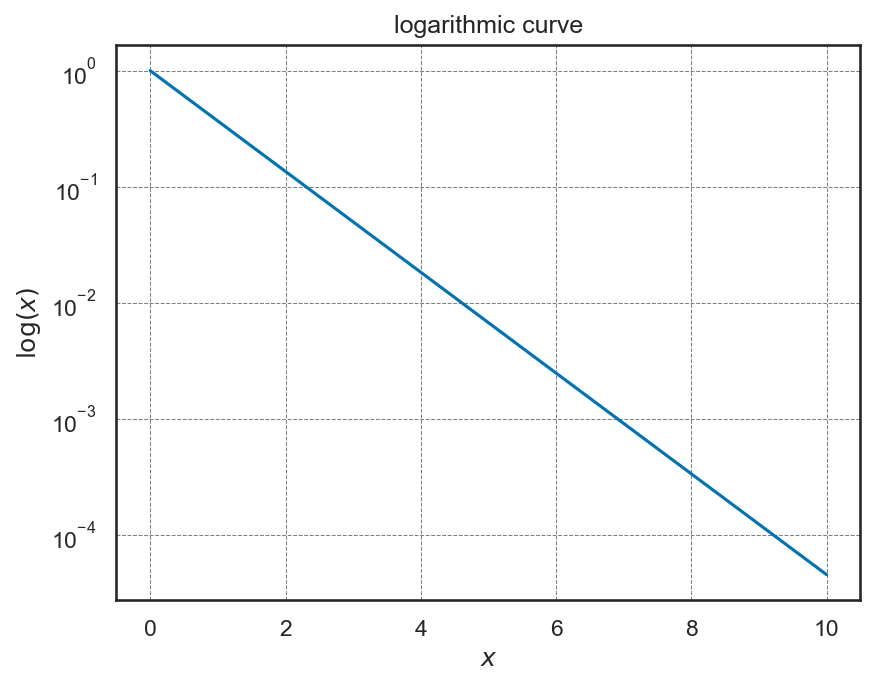

In [17]:
# データの用意
xs = np.linspace(0.0001, 10.0, 1000)
ys = np.exp(-xs)

# 折れ線グラフの描画
plt.plot(xs, ys, label="$\log(x)$")

# タイトルの設定
plt.title("logarithmic curve")
plt.xlabel("$x$")
plt.ylabel("$\log(x)$")

# 軸のスケール設定
plt.yscale("log")

# グリッド線の表示
plt.yticks(np.logspace(-4, 0, 5))
plt.grid(axis="x", color="gray", linestyle="--", linewidth=0.5)
plt.grid(axis="y", color="gray", linestyle="--", linewidth=0.5)
plt.show()

### エラーバーの表示


以下の例では、リンゴ、バナナ、サクランボ、ドリアンの価格に対して、平均と標準偏差を求めて、エラーバーを表示してみる。使用するデータは以下の通り。 (Pandas の使い方については[次節](sec:pandas)で詳しく紹介)


In [18]:
import pandas as pd

df = pd.DataFrame(columns=["Apple", "Banana", "Cherry", "Durian"])
df.loc["Jan", :] = [100, 50, 300, 500]
df.loc["Feb", :] = [120, 60, 310, 600]
df.loc["Mar", :] = [110, 55, 350, 550]
df.loc["Apr", :] = [130, 50, 400, 580]
df.loc["May", :] = [90, 50, 350, 550]
df.loc["Jun", :] = [120, 40, 320, 520]
df

,Apple,Banana,Cherry,Durian
Jan,100,50,300,500
Feb,120,60,310,600
Mar,110,55,350,550
Apr,130,50,400,580
May,90,50,350,550
Jun,120,40,320,520


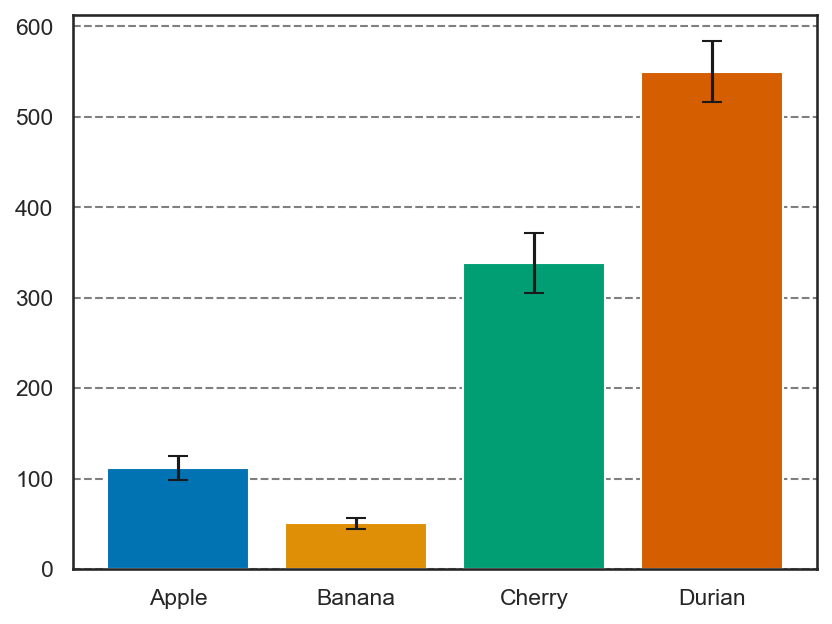

In [19]:
avgs = []
errs = []
for key in df.columns:
    avg = np.mean(df.loc[:, key])
    std = np.std(df.loc[:, key])
    avgs.append(avg)
    errs.append(std)

labels = df.columns.tolist()

plt.bar(labels, avgs, yerr=errs, capsize=5, color=color_palette)
plt.grid(axis="y", color="tab:gray", linestyle="--")
plt.show()

### その他の機能


#### 背景色の設定

`plt.gca().set_facecolor`を用いる。


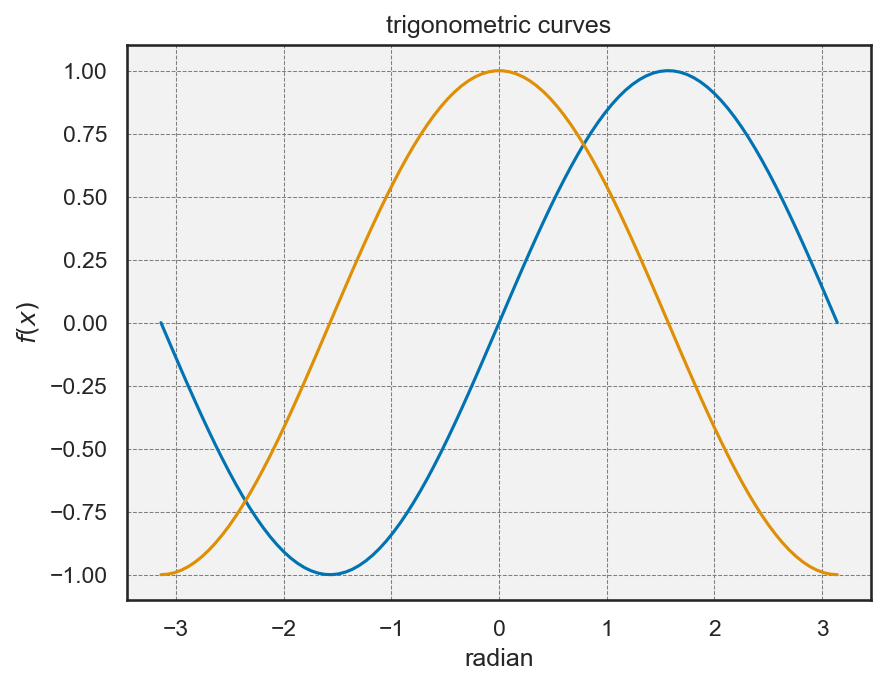

In [20]:
# データの用意
xs = np.linspace(-np.pi, np.pi, 100)
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)
# 折れ線グラフの描画
plt.plot(xs, ys_sin, label="$\sin(x)$")
plt.plot(xs, ys_cos, label="$\cos(x)$")
# タイトルの設定
plt.title("trigonometric curves")
plt.xlabel("radian")
plt.ylabel("$f(x)$")
# グリッド線の表示
plt.grid(axis="x", color="tab:gray", linestyle="--", linewidth=0.5)
plt.grid(axis="y", color="tab:gray", linestyle="--", linewidth=0.5)
plt.gca().set_facecolor((0.95, 0.95, 0.95))
plt.show()

#### 注釈を入れる

`plt.gca().annotate`を用いる。


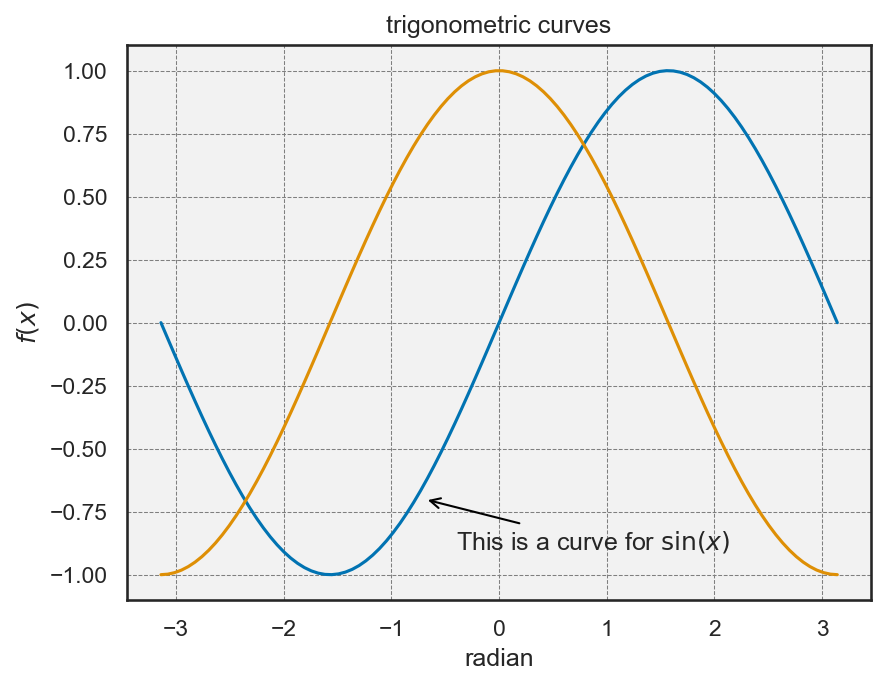

In [21]:
# データの用意
xs = np.linspace(-np.pi, np.pi, 100)
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)
# 折れ線グラフの描画
plt.plot(xs, ys_sin, label="$\sin(x)$")
plt.plot(xs, ys_cos, label="$\cos(x)$")
# タイトルの設定
plt.title("trigonometric curves")
plt.xlabel("radian")
plt.ylabel("$f(x)$")
# グリッド線の表示
plt.grid(axis="x", color="tab:gray", linestyle="--", linewidth=0.5)
plt.grid(axis="y", color="tab:gray", linestyle="--", linewidth=0.5)
plt.gca().set_facecolor((0.95, 0.95, 0.95))
# 注釈を入れる
plt.gca().annotate(
    "This is a curve for $\sin(x)$",
    xy=(-0.7, -0.7),
    xytext=(-0.4, -0.9),
    arrowprops={"arrowstyle": "->", "color": "black"},
)
plt.show()

#### 複数のグラフを並べる


複数のグラフを並べるにはいくつの方法がある。

一つ目は、`plt.figure`で`Figure`型の変数を取得した後に`fig.add_subplot(...)`を用いる方法で、`add_subplot`の引数に列数、行数、その何番目か、を表わす 3 つの数字を渡す。例えば、2 行 3 列の要素のうち、1 行 3 列の要素が欲しければ`add_subplot(233)`となり、2 行 2 列の要素が欲しければ`add_subplot(235)`と言った具合だ。


In [22]:
# データの用意
xs = np.linspace(-np.pi, np.pi, 100)
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)

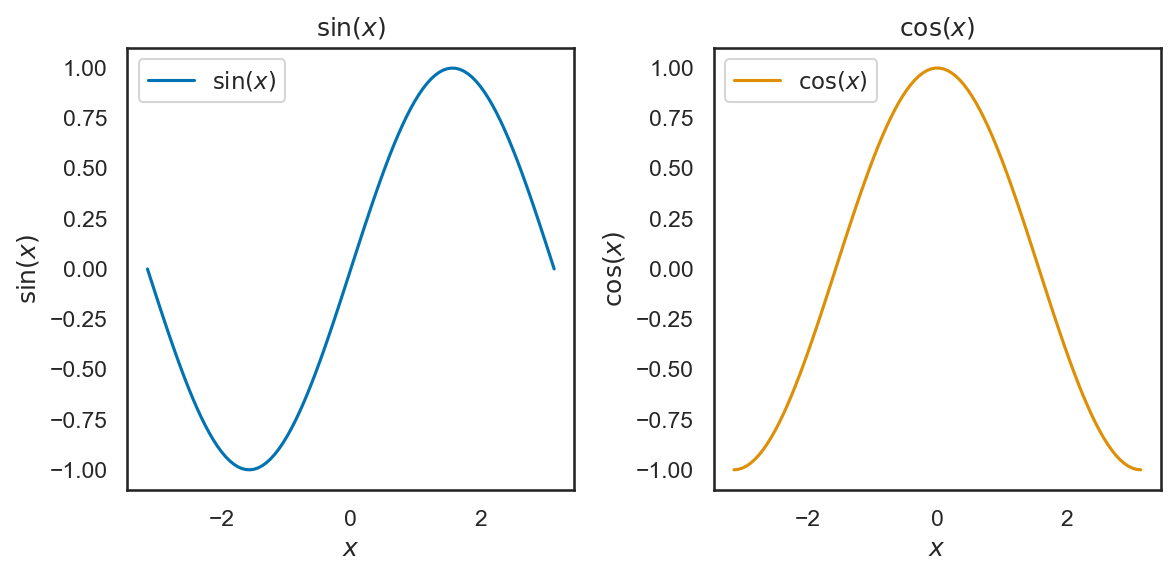

In [23]:
"""
add_subplotを使う場合
"""

fig = plt.figure(figsize=(8, 4))

# 1つ目のグラフ
ax1 = fig.add_subplot(121)
ax1.plot(xs, ys_sin, color=color_palette[0], label="$\sin(x)$")
ax1.set_title("$\sin(x)$")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$\sin(x)$")
ax1.legend(loc="upper left")

# 2つ目のグラフ
ax2 = fig.add_subplot(122)
ax2.plot(xs, ys_cos, color=color_palette[1], label="$\cos(x)$")
ax2.set_title("$\cos(x)$")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$\cos(x)$")
ax2.legend(loc="upper left")

# 複数のグラフを並べると、要素が重なることがあるのでplt.tight_layout()を呼ぶとよい
plt.tight_layout()
plt.show()

2 つめは、`plt.subplots`関数により、一度に全てのグラフ要素を作ってしまう方法で、2 行 3 列の要素が作りたければ、`plt.subplots(2, 3)`のようにする。すると、`Figure`と`Axes`の配列が返ってくるので、配列の要素に対して、グラフの描画命令を呼び出せば良い。


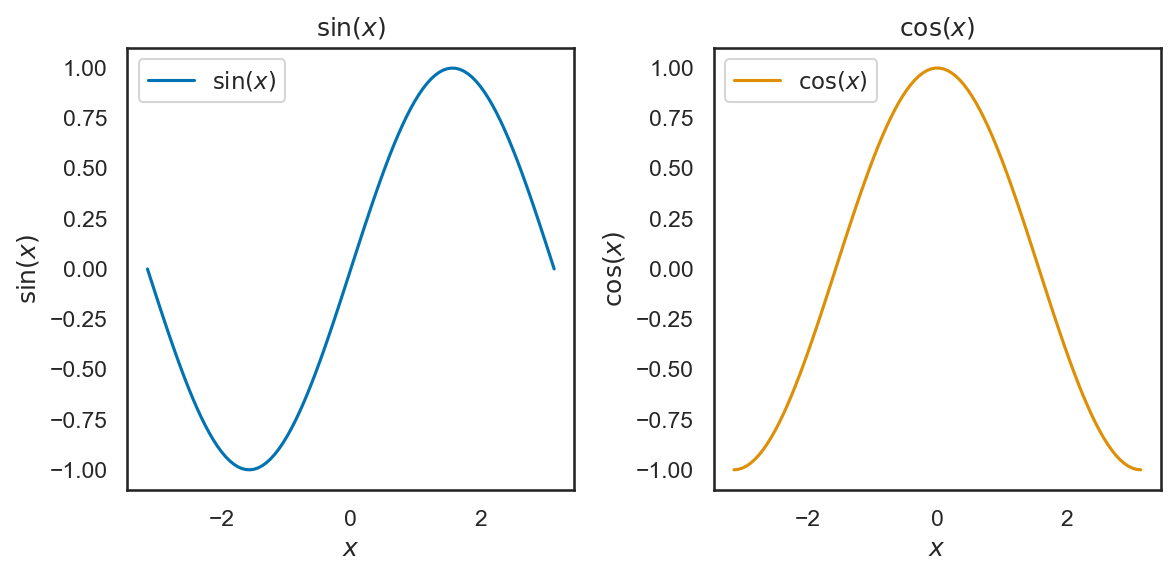

In [24]:
"""
plt.subplotsを使う場合
"""

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# 1つ目のグラフ
axs[0].plot(xs, ys_sin, color=color_palette[0], label="$\sin(x)$")
axs[0].set_title("$\sin(x)$")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$\sin(x)$")
axs[0].legend(loc="upper left")

# 2つ目のグラフ
axs[1].plot(xs, ys_cos, color=color_palette[1], label="$\cos(x)$")
axs[1].set_title("$\cos(x)$")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$\cos(x)$")
axs[1].legend(loc="upper left")

# 複数のグラフを並べると、要素が重なることがあるのでplt.tight_layout()を呼ぶとよい
plt.tight_layout()
plt.show()

## 三次元データのプロット


最後に、Matplotlib を用いた三次元プロットについてみてみる。今回は機械学習で広く用いられる Swiss Roll のデータを用いて可視化をしてみよう。

3 次元プロットを作成する場合には、単に `plt.scatter`等を呼び出すだけでは不十分で、3 次元プロット用の`Axes`を作成する必要がある。具体的には`add_subplot`のパラメータに`projection="3d"`を与える。

あとは、これまで x 座標と y 座標だけを引数として渡していた`scatter`関数に対して、z 座標を表わす値を合わせて指定すれば良い。


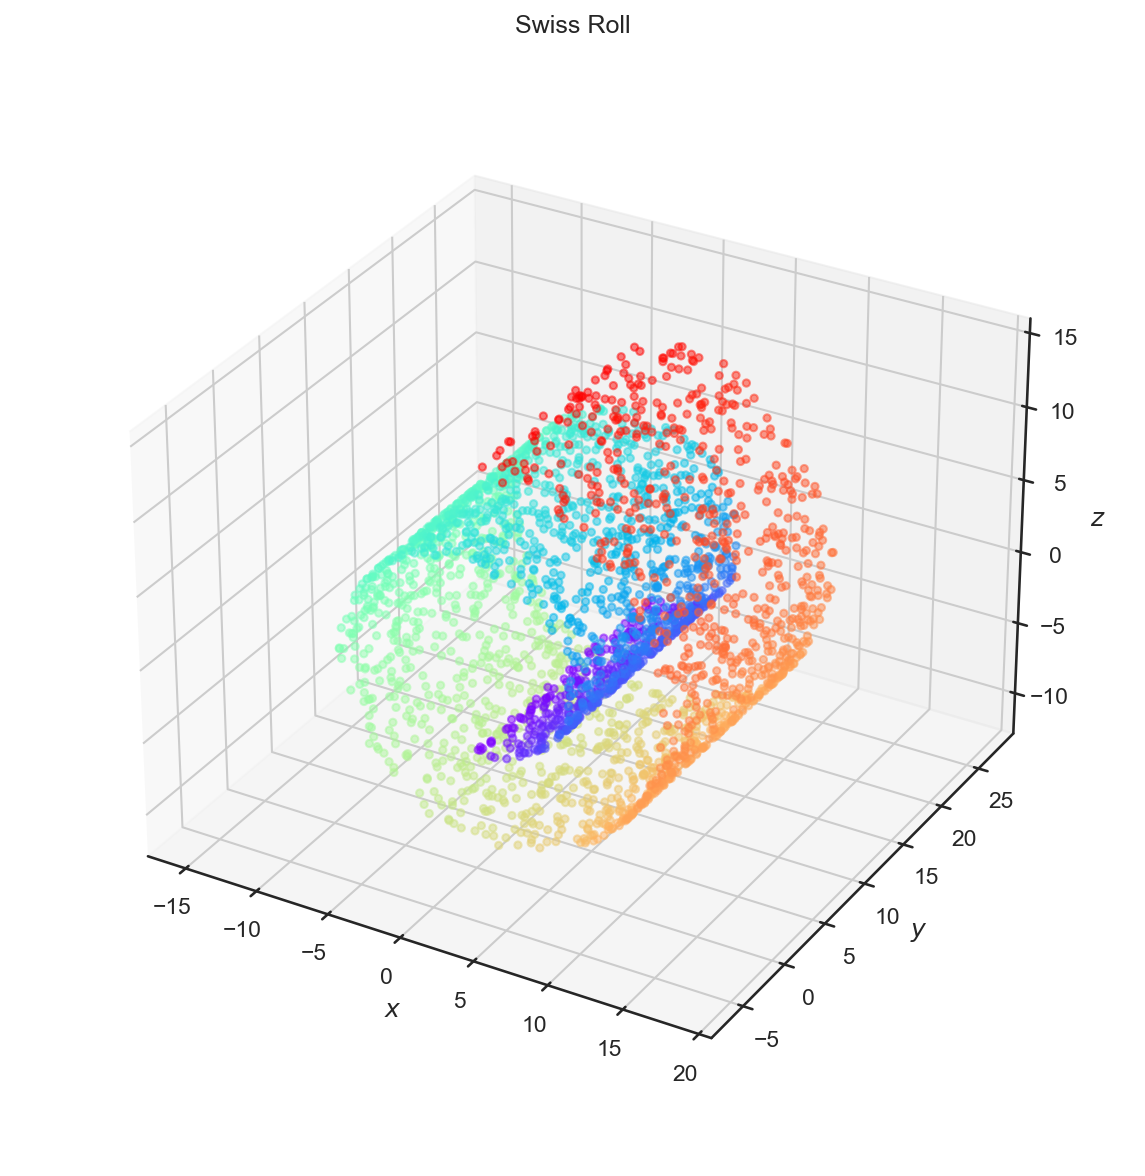

In [25]:
from matplotlib import cm
from sklearn.datasets import make_swiss_roll

# データの取得
# X: [nx3]のnumpyの配列
# t: Swiss Rollのシートの巻き込み方向の座標
X, t = make_swiss_roll(n_samples=3000, noise=0.01)
t = (t - t.min()) / (t.max() - t.min())

# 巻き込み方向の距離に応じて色をつける
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[:, 0],
    X[:, 1],
    X[:, 2],
    c=t,
    cmap="rainbow",
    alpha=0.5,
    s=12,
    linewidth=1,
)

ax.set_title("Swiss Roll")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.axis("equal")

# z軸のラベルが見切れるので、少し引きのカメラから見る
ax.set_box_aspect(aspect=None, zoom=0.9)

plt.tight_layout()
plt.show()

:::{admonition} Matplotlib の Figure の画素数
:class: note

Matplotlib で Figure を作成する際、`plt.figure(figsize=(5, 5))`のように縦横のサイズを指定することができる。このサイズは画像のインチ数を表わしていて、この例では 5 インチ ×5 インチの画像が作られる。

これとは別に`plt.figure(figsize=(5, 5), dpi=100)`のように DPI (dots per inch)を指定することもでき、これは 1 インチに含まれる画素数を指定する。従って、この例では、500×500 画素の画像が作られることになる。
:::


(ssec:seaborn)=

## Seaborn の併用


Seaborn は Matplotlib と同様にデータ可視化のためのライブラリで、より複雑なグラフをより洗練された見た目で表示することができる。データを Pandas の DataFrame で準備する必要があるなど、少し覚えるのには段階を踏む必要があるが、慣れればより目的に沿った見た目のグラフを簡単に作成できる。

なお、単に Seaborn 風にテーマを変更したいだけで、描画はこれまで通り Matplotlib で行う、という場合には、単に

```
import seaborn as sns
sns.set()
```

とすると Matplotlib で使用されるテーマが変わる。Seaborn には多数のテーマが用意されており、必要に応じて、`set`関数に`style=...`と`palette=...`の 2 つのパラメータを指定すると良い。

どのような、スタイルやパレットが使えるかについては、以下のウェブページを参考のこと。

- Controlling figure aesthetics: <https://seaborn.pydata.org/tutorial/aesthetics.html>
- Choosing color palettes: <https://seaborn.pydata.org/tutorial/color_palettes.html>


**例 1: ヒストグラムと近似曲線**


冒頭では Matplotlib で表示したヒストグラムと近似曲線の描画だが、Seaborn を使うと、より簡単に作成することができる。ここでは、二種類の正規分布から抽出したデータを重ねてグラフに表示してみる。

ヒストグラムを描画する Seaborn の関数は`histplot`で、これに適当な引数を与える。この時、Matplotlib では自分で計算する必要があった近似曲線が`kde=True` (kde は kernel density estimation の略)を指定するだけで簡単に描画できる。


In [26]:
# 準備
import pandas as pd
import seaborn as sns

# テーマの初期化
sns.set_theme(style="whitegrid", palette="colorblind")

In [27]:
# データをPandasのDataFrameにセットする
x0 = np.random.normal(size=(10000)) * 0.1 + 0.1
x1 = np.random.normal(size=(10000)) * 0.2 - 0.2

labels = ["x0"] * len(x0) + ["x1"] * len(x1)
values = np.concatenate([x0, x1], axis=0)

df = pd.DataFrame()
df.loc[:, "values"] = values
df.loc[:, "labels"] = labels

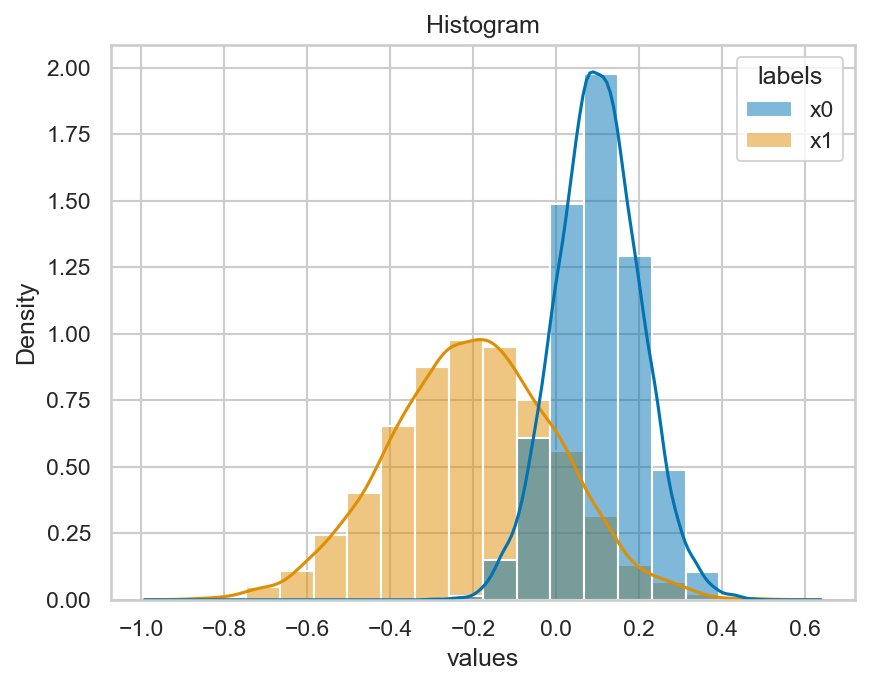

In [28]:
# x=...に指定された値に対してヒストグラムを計算
# hue=...に指定したラベルに応じて、ヒストグラムの色を変更
# kde=Trueとすることで、近似曲線が描画される
g = sns.histplot(
    data=df,
    x="values",
    hue="labels",
    kde=True,
    stat="density",
    bins=20,
)
g.set(title="Histogram")
plt.show()

**例 2: 二次元散布図と各軸における周辺分布の描画**


Seaborn の`joinplot`を使うと、二次元散布図を作成して、さらにそれぞれの分布を表わす近似曲線を同時に描画することもできる。


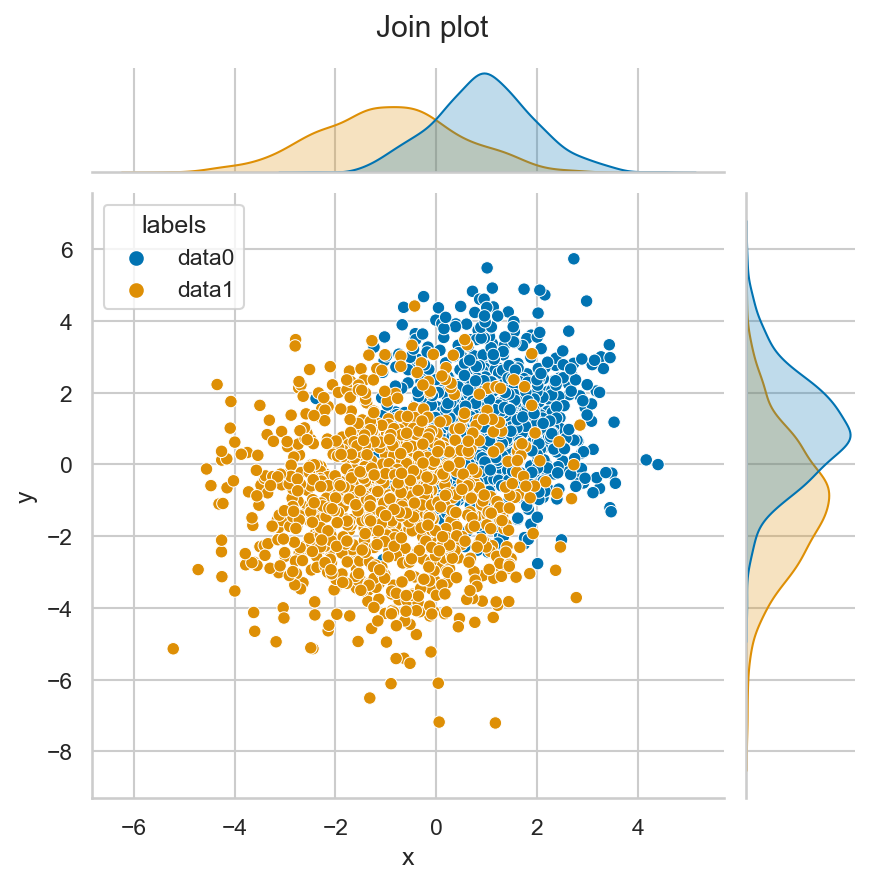

In [29]:
# データの用意
data0 = np.random.multivariate_normal(mean=[1.0, 1.0], cov=np.diag([1.0, 2.0]), size=(1000))
data1 = np.random.multivariate_normal(mean=[-1.0, -1.0], cov=np.diag([2.0, 3.0]), size=(1000))

xs = np.concatenate([data0[:, 0], data1[:, 0]], axis=0)
ys = np.concatenate([data0[:, 1], data1[:, 1]], axis=0)
labels = ["data0"] * len(data0) + ["data1"] * len(data1)

df = pd.DataFrame()
df.loc[:, "x"] = xs
df.loc[:, "y"] = ys
df.loc[:, "labels"] = labels

df["labels"] = df["labels"].astype("category")

g = sns.jointplot(data=df, x="x", y="y", hue="labels")
plt.suptitle("Join plot")

# タイトルが重なってしまうので微調整
plt.subplots_adjust(top=0.92)
plt.show()

Seaborn では、この他にも数え切れないほど、様々なグラフが作成できるので、より深く勉強したい人は、Seaborn のギャラリーを見て、自分の作りたいグラフを探してみると良い。

seaborn - Example gallery: <https://seaborn.pydata.org/examples/>


:::{admonition} 色覚障がいを持つ方への配慮
:class: important

多くの人には見過ごされがちだが、グラフ等を作成に色を使う場合には、色覚障がいの方への配慮を検討してほしい。色覚障がいは、女性よりも男性に多いと言われており、実に日本人男性の 20 人に 1 人が何らかの色覚異常を持っていると言われている。

人間の色を知覚する細胞である錐体細胞には赤に敏感な L 錐体、緑に敏感な M 錐体、青に敏感な S 錐体がある。このうち、L 錐体に異常をもち赤の認識が難しいことを赤色盲 (protanope)、緑の認識が難しいことを緑色盲 (deuteranope)という。Matplotlib でデフォルト設定されているカラーパレットは Tableau10 というものだが、このパレットの彩度や輝度を色覚障がいの種類によって、見え方がどう変わるかを示したウェブページがあるので、参考にしてほしい。

<https://gist.github.com/mwaskom/b35f6ebc2d4b340b4f64a4e28e778486>

なお、本資料では Seaborn で提供される、`colorblind`のパレットを使用してグラフの色を設定しており、同様の設定は、`sns.set(palette="colorblind")`とすることで実現できる。
:::
